In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

import warnings
warnings.filterwarnings("ignore")

In [9]:
train_dir = r'C:\Users\win10\Downloads\archive (7)\data\train'
val_dir = r'C:\Users\win10\Downloads\archive (7)\data\val'

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,                
    rotation_range=20,             
    width_shift_range=0.2,         
    height_shift_range=0.2,        
    shear_range=0.2,               
    zoom_range=0.2,                
    horizontal_flip=True,          
    fill_mode='nearest'            
)

test_datagen = ImageDataGenerator(rescale=1./255)  

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  
)

Found 8863 images belonging to 2 classes.


In [12]:
test_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 600 images belonging to 2 classes.


In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 697s 2s/step - accuracy: 0.5341 - loss: 0.7024 - val_accuracy: 0.5450 - val_loss: 0.6494
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 606s 2s/step - accuracy: 0.5835 - loss: 0.6697 - val_accuracy: 0.5517 - val_loss: 0.6371
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 596s 2s/step - accuracy: 0.5934 - loss: 0.6520 - val_accuracy: 0.6267 - val_loss: 0.5585
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 570s 2s/step - accuracy: 0.6387 - loss: 0.6173 - val_accuracy: 0.6583 - val_loss: 0.5530
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 530s 2s/step - accuracy: 0.6833 - loss: 0.5832 - val_accuracy: 0.6567 - val_loss: 0.5667
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 522s 2s/step - accuracy: 0.7069 - loss: 0.5501 - val_accuracy: 0.6033 - val_loss: 0.5855
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - accuracy: 0.7430 - loss: 0.5047 - val_accuracy: 0.7500 - val_loss: 0.5790
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 491s 2s/step - accuracy: 0.7716 - loss: 0.4748 - val_accu

In [9]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 377ms/step - accuracy: 0.6072 - loss: 0.6824
Test accuracy: 0.62


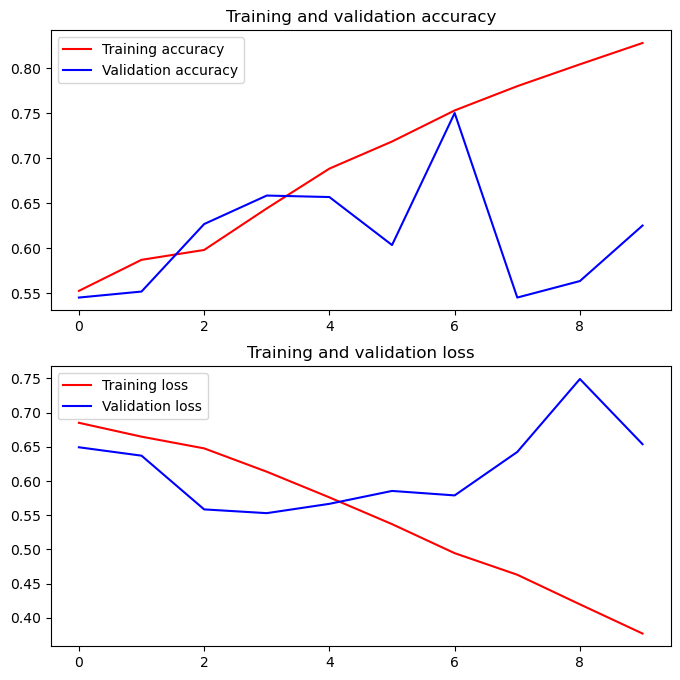

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

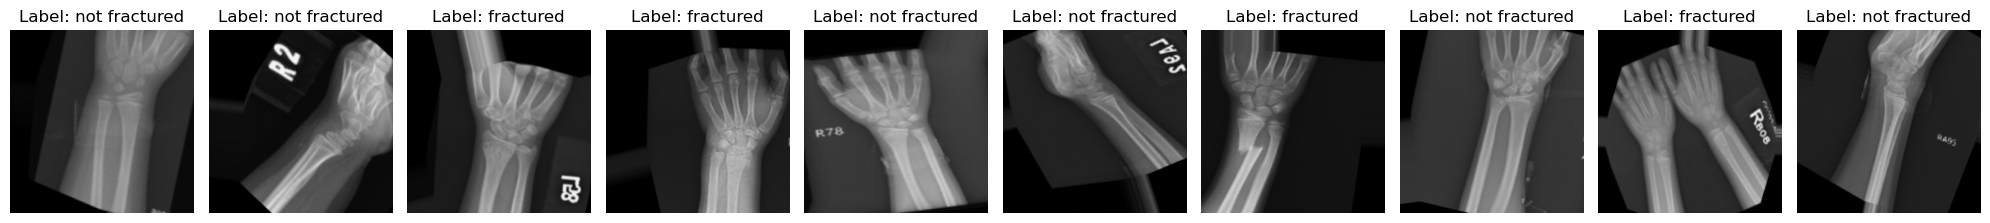

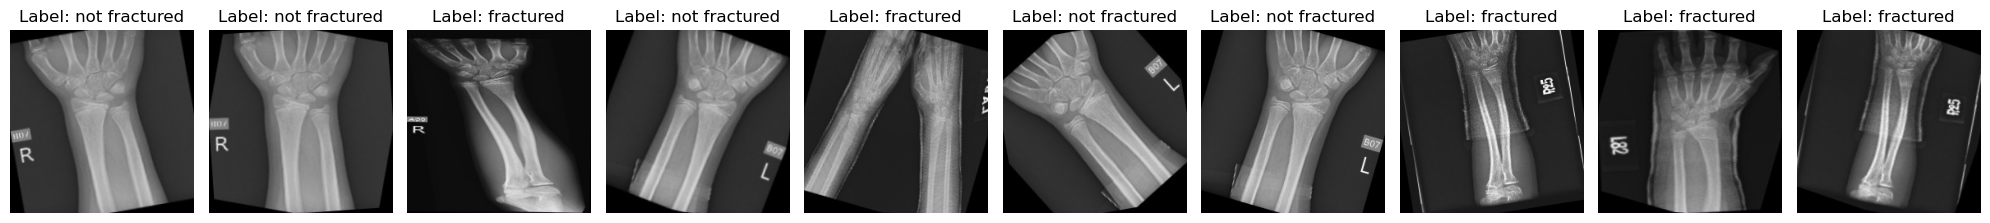

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def plot_images(images_arr, labels, class_names):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20, 20))
    axes = axes.flatten()
    for img, ax, label in zip(images_arr, axes, labels):
        ax.imshow(img)
        ax.set_title(f'Label: {class_names[int(label)]}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()


train_images, train_labels = next(train_generator)  
class_names = list(train_generator.class_indices.keys())


plot_images(train_images[:10], train_labels[:10], class_names)


test_images, test_labels = next(test_generator)  


plot_images(test_images[:10], test_labels[:10], class_names)

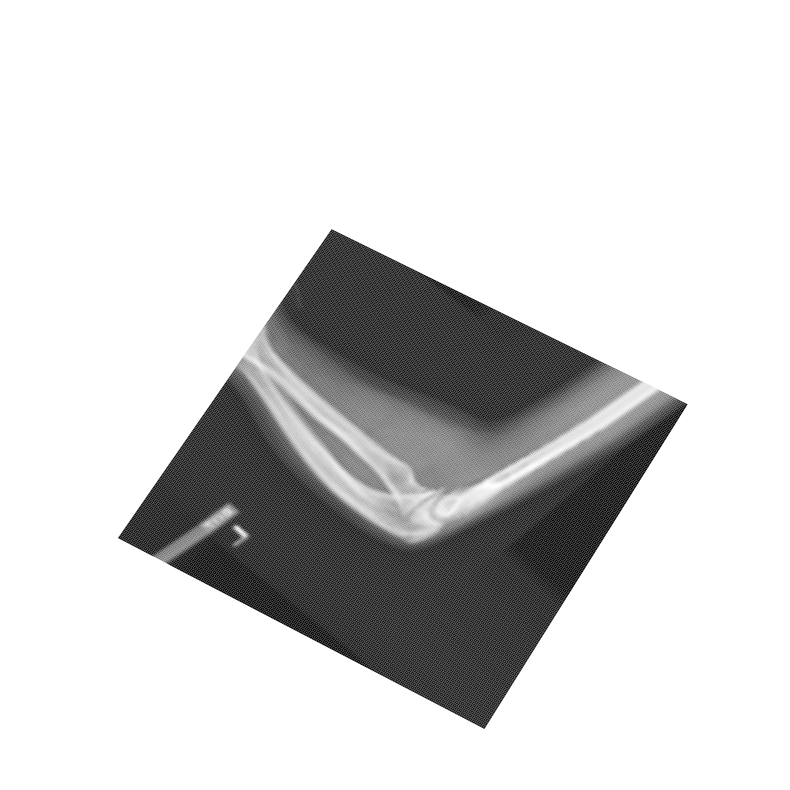

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def create_3d_surface(image):
    
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    normalized_image = image / 255.0
    
    
    x = np.linspace(0, normalized_image.shape[1], normalized_image.shape[1])
    y = np.linspace(0, normalized_image.shape[0], normalized_image.shape[0])
    x, y = np.meshgrid(x, y)
    
    
    z = normalized_image
    
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='gray', rstride=1, cstride=1, edgecolor='none')
    
    
    ax.view_init(elev=60, azim=30)  
    ax.set_zlim(0, 1)               
    
    ax.axis('off')
    plt.show()


train_images, _ = next(train_generator)  


image = train_images[0]


create_3d_surface(image)


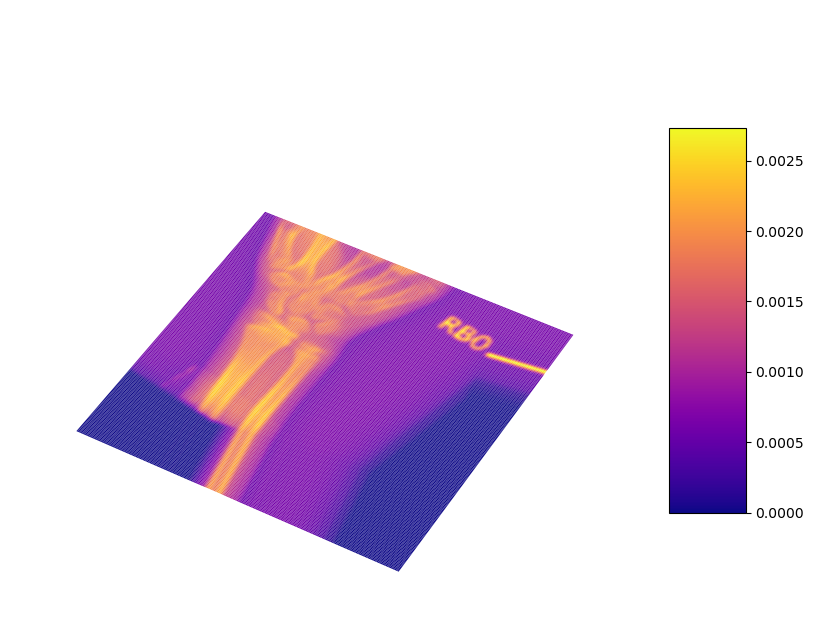

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


def create_enhanced_3d_surface(image):
   
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    normalized_image = image / 255.0
    
    
    blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)
    
    
    x = np.linspace(0, blurred_image.shape[1], blurred_image.shape[1])
    y = np.linspace(0, blurred_image.shape[0], blurred_image.shape[0])
    x, y = np.meshgrid(x, y)
    
    
    z = blurred_image
    
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    
    surface = ax.plot_surface(x, y, z, cmap='plasma', rstride=1, cstride=1, edgecolor='none')
    
   
    ax.set_box_aspect([1,1,0.5])  
    ax.view_init(elev=45, azim=120)  
    ax.set_zlim(0, 1)  
    ax.axis('off')
    
    
    fig.colorbar(surface, shrink=0.5, aspect=5)
    
    plt.show()


train_images, _ = next(train_generator)  


image = train_images[0]


create_enhanced_3d_surface(image)


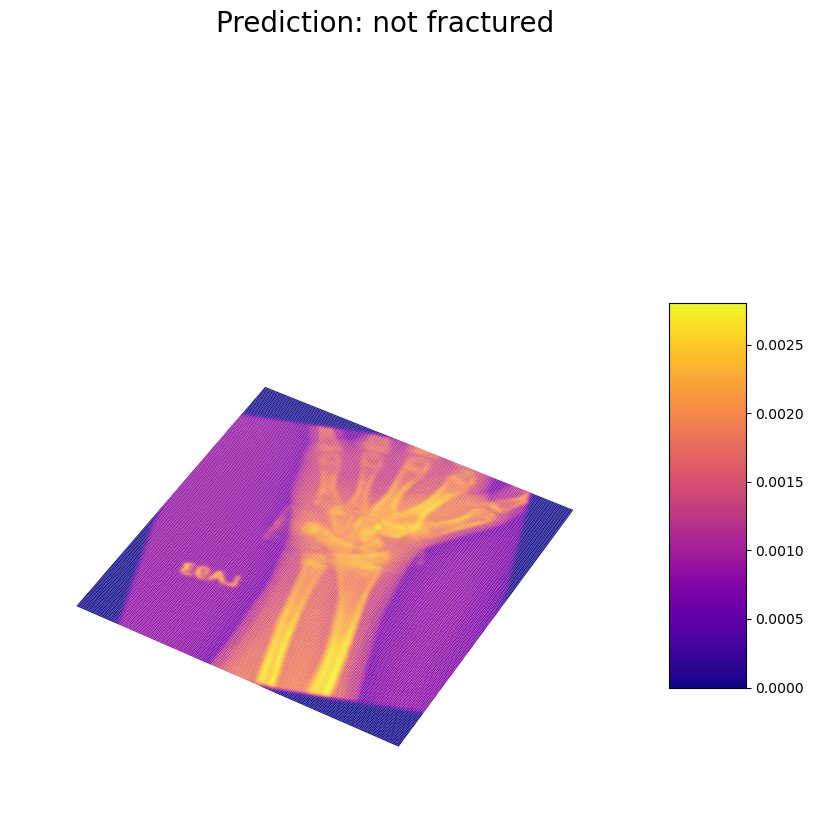

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


def create_3d_surface_with_prediction(image, prediction, class_names):
    
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    normalized_image = image / 255.0
    
   
    blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)
    
    
    x = np.linspace(0, blurred_image.shape[1], blurred_image.shape[1])
    y = np.linspace(0, blurred_image.shape[0], blurred_image.shape[0])
    x, y = np.meshgrid(x, y)
    
   
    z = blurred_image
    
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    
    surface = ax.plot_surface(x, y, z, cmap='plasma', rstride=1, cstride=1, edgecolor='none')
    
   
    ax.set_box_aspect([1,1,0.5])  
    ax.view_init(elev=45, azim=120)  
    ax.set_zlim(0, 1)  
    ax.axis('off')
    
    
    fig.colorbar(surface, shrink=0.5, aspect=5)
    
    
    prediction_text = f'Prediction: {class_names[int(prediction)]}'
    plt.suptitle(prediction_text, fontsize=20, ha='center')
    
    plt.show()


test_images, test_labels = next(test_generator)  


image = test_images[0]
prediction = test_labels[0]  

create_3d_surface_with_prediction(image, prediction, class_names)


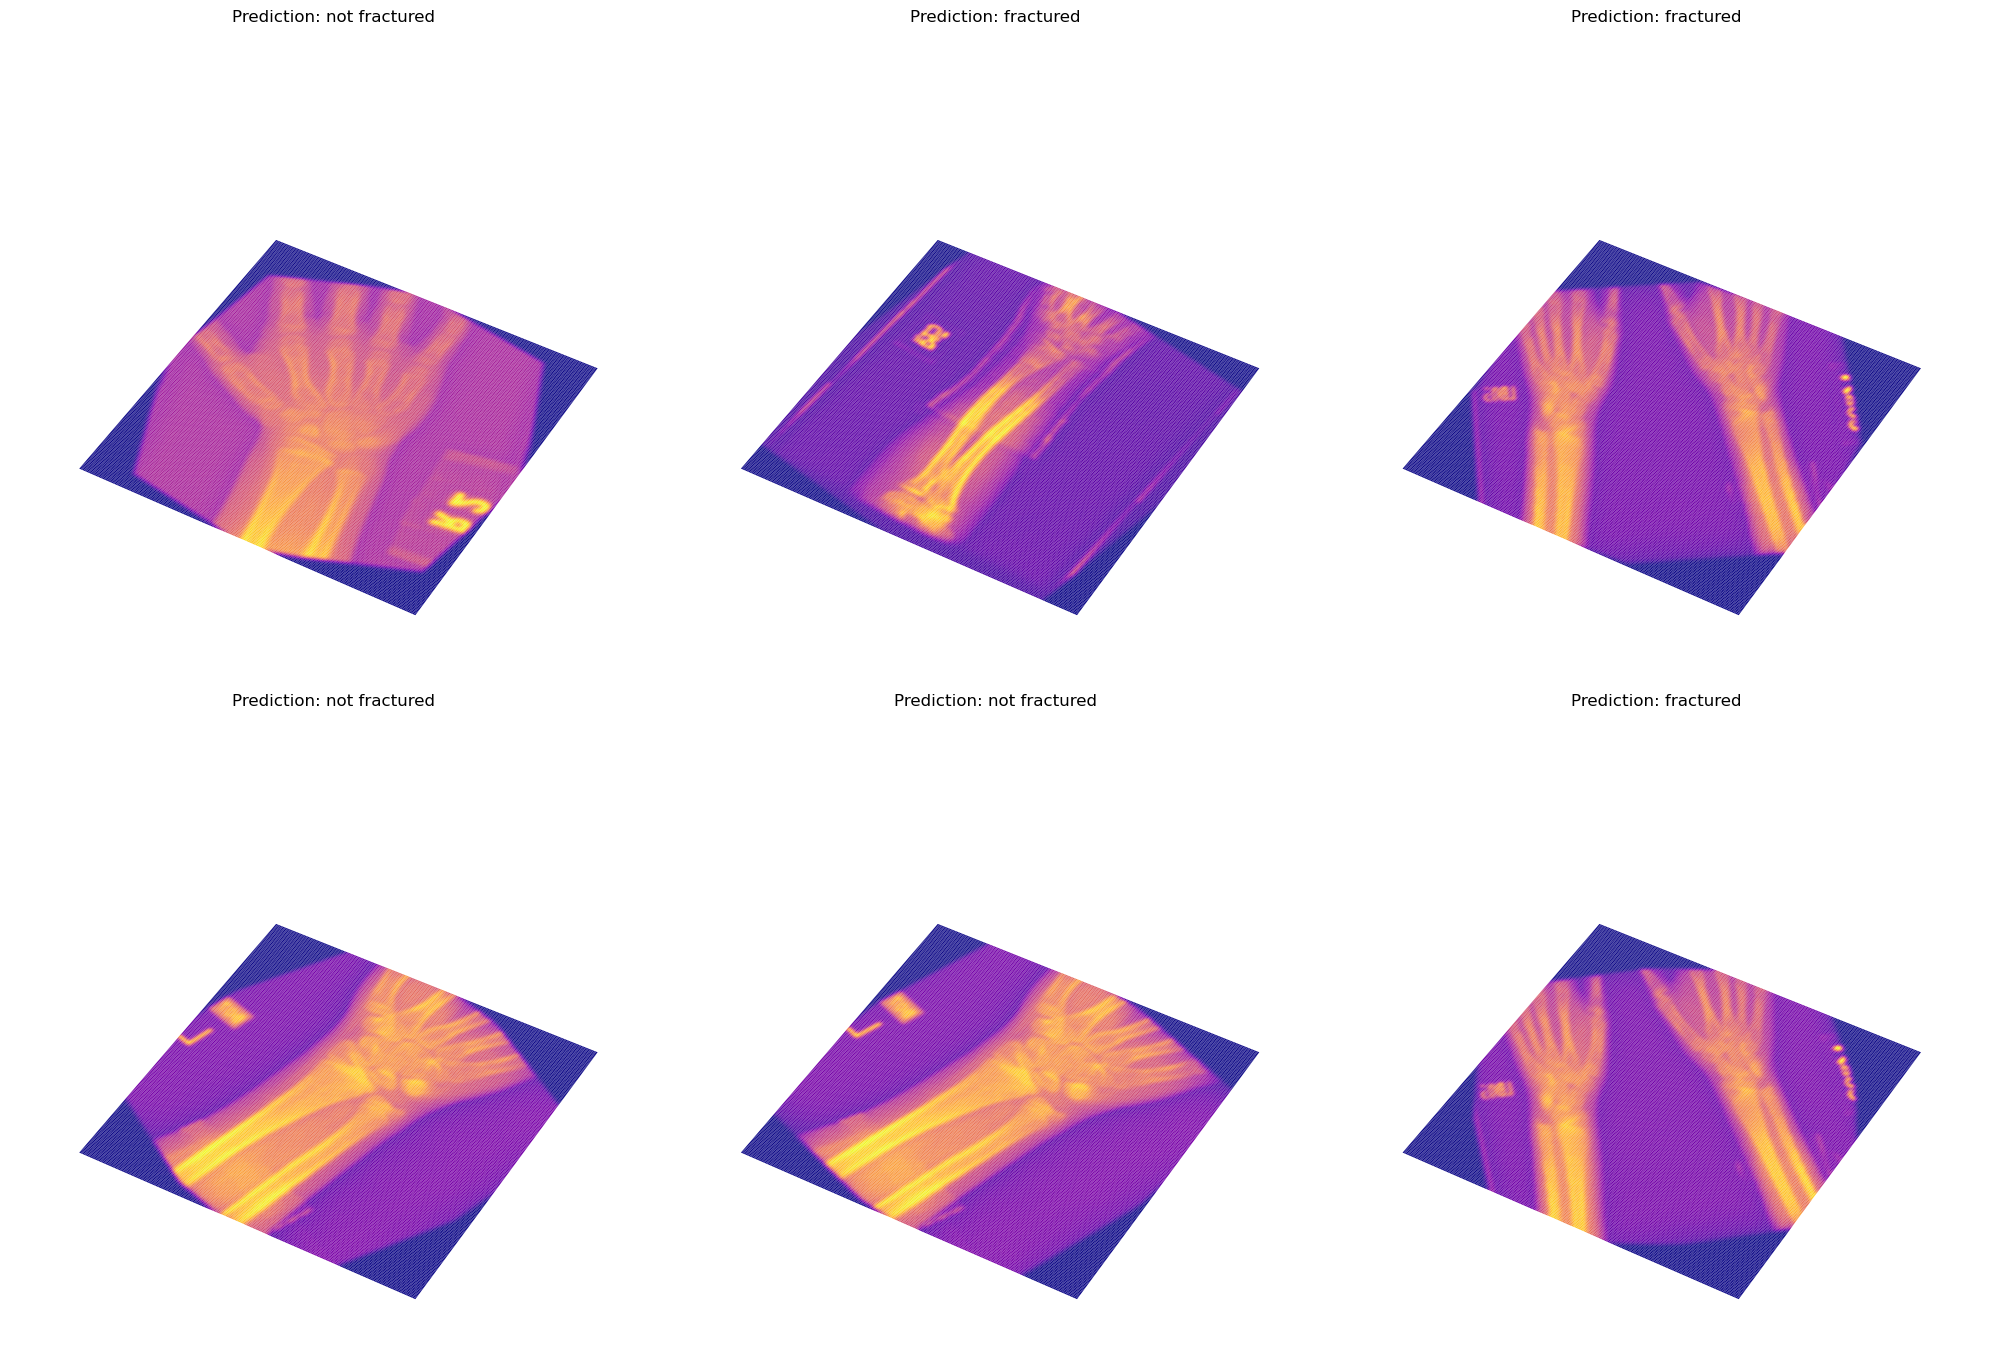

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


def create_3d_surface_with_prediction(image, prediction, class_names, ax):
    
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    normalized_image = image / 255.0
    
    
    blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)
    
    
    x = np.linspace(0, blurred_image.shape[1], blurred_image.shape[1])
    y = np.linspace(0, blurred_image.shape[0], blurred_image.shape[0])
    x, y = np.meshgrid(x, y)
    
   
    z = blurred_image
    
    
    surface = ax.plot_surface(x, y, z, cmap='plasma', rstride=1, cstride=1, edgecolor='none')
    
    
    ax.set_box_aspect([1,1,0.5])  
    ax.view_init(elev=45, azim=120)  
    ax.set_zlim(0, 1)  
    ax.axis('off')
    
    
    prediction_text = f'Prediction: {class_names[int(prediction)]}'
    ax.set_title(prediction_text, fontsize=12)


def visualize_batch_3d(images, predictions, class_names, ncols=3):
    n_images = len(images)
    n_rows = (n_images + ncols - 1) // ncols  
    
    fig = plt.figure(figsize=(20, n_rows * 7))  
    for i in range(n_images):
        ax = fig.add_subplot(n_rows, ncols, i + 1, projection='3d')
        create_3d_surface_with_prediction(images[i], predictions[i], class_names, ax)
    
    plt.tight_layout()
    plt.show()


test_images, test_labels = next(test_generator)  
predictions = test_labels  


subset_images = test_images[:6]
subset_predictions = predictions[:6]


class_names = list(test_generator.class_indices.keys())


visualize_batch_3d(subset_images, subset_predictions, class_names, ncols=3)


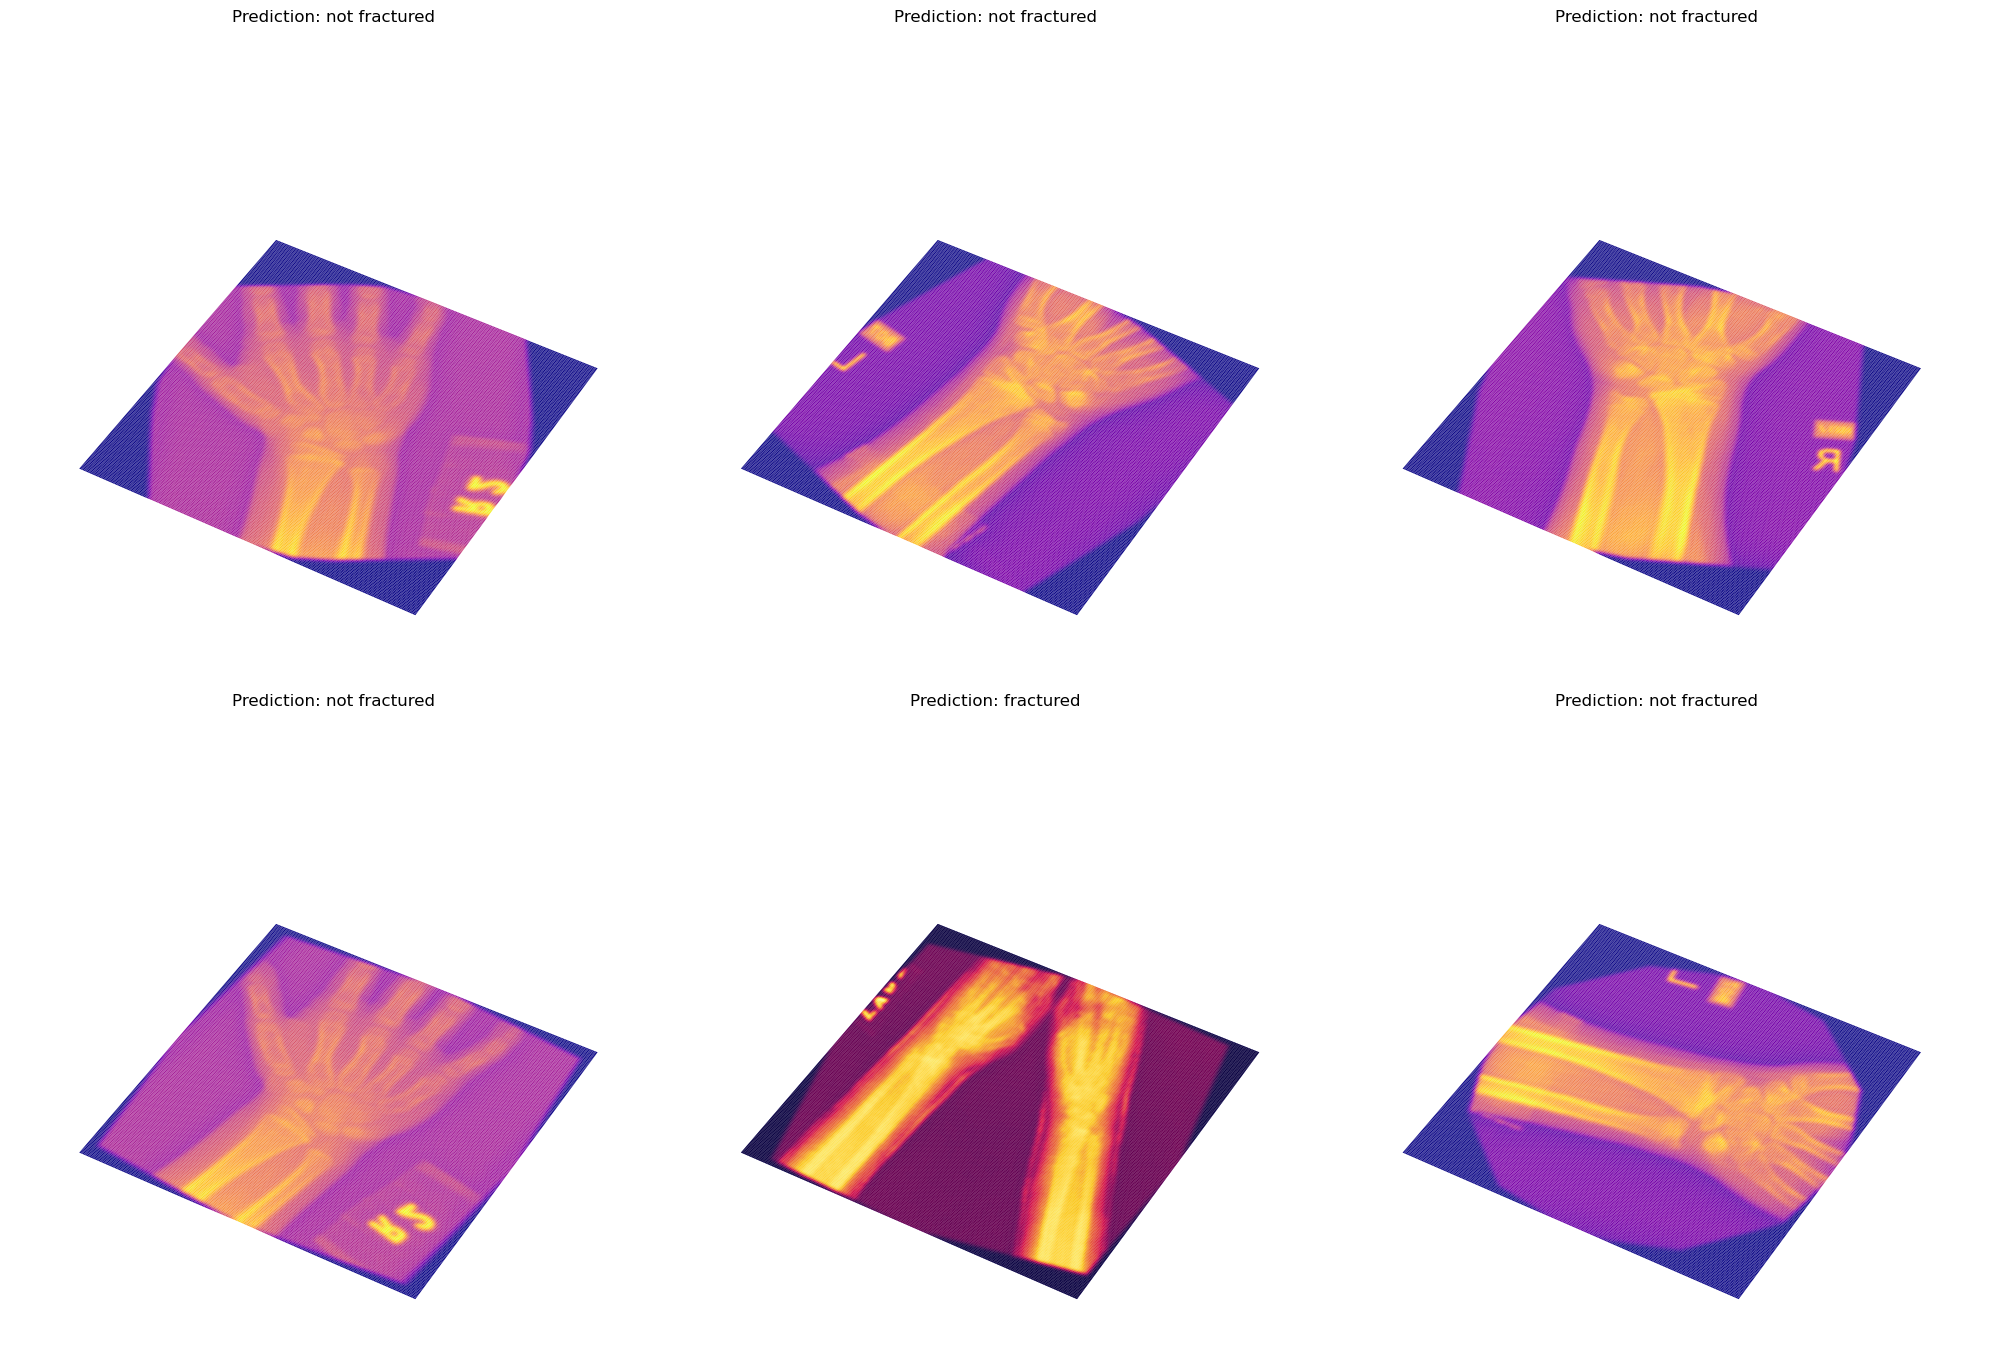

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


def create_3d_surface_with_prediction_and_highlight(image, prediction, class_names, ax):
    
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    normalized_image = image / 255.0
    
    
    blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)
    
    
    x = np.linspace(0, blurred_image.shape[1], blurred_image.shape[1])
    y = np.linspace(0, blurred_image.shape[0], blurred_image.shape[0])
    x, y = np.meshgrid(x, y)
    
   
    z = blurred_image
    
    
    if class_names[int(prediction)] == 'fractured':
        
        highlight_color = 'hot'  
        surface = ax.plot_surface(x, y, z, cmap='plasma', rstride=1, cstride=1, edgecolor='none')
        highlight_surface = ax.plot_surface(x, y, z, cmap=highlight_color, alpha=0.5, rstride=1, cstride=1, edgecolor='none')
    else:
        
        surface = ax.plot_surface(x, y, z, cmap='plasma', rstride=1, cstride=1, edgecolor='none')
    
    
    ax.set_box_aspect([1,1,0.5])  
    ax.view_init(elev=45, azim=120)  
    ax.set_zlim(0, 1)  
    ax.axis('off')
    
    
    prediction_text = f'Prediction: {class_names[int(prediction)]}'
    ax.set_title(prediction_text, fontsize=12)


def visualize_batch_3d_highlight(images, predictions, class_names, ncols=3):
    n_images = len(images)
    n_rows = (n_images + ncols - 1) // ncols  
    
    fig = plt.figure(figsize=(20, n_rows * 7))  
    for i in range(n_images):
        ax = fig.add_subplot(n_rows, ncols, i + 1, projection='3d')
        create_3d_surface_with_prediction_and_highlight(images[i], predictions[i], class_names, ax)
    
    plt.tight_layout()
    plt.show()


test_images, test_labels = next(test_generator)  
predictions = test_labels  


subset_images = test_images[:6]
subset_predictions = predictions[:6]


class_names = list(test_generator.class_indices.keys())


visualize_batch_3d_highlight(subset_images, subset_predictions, class_names, ncols=3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
Accuracy: 0.62


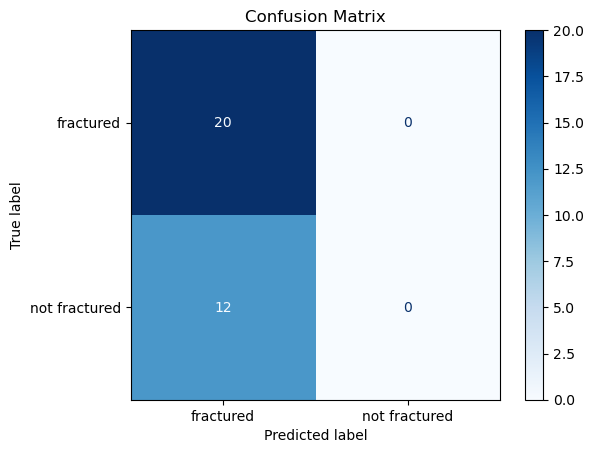

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


def compute_and_plot_metrics(y_true, y_pred, class_names):
    
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    
    
    cm = confusion_matrix(y_true, y_pred, labels=list(range(len(class_names))))
    
   
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix')
    plt.show()


def get_predictions_from_model(model, generator):
    y_true = []
    y_pred = []
    for images, labels in generator:
        y_true.extend(labels)  
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))
        if len(y_true) >= len(generator):
            break
    return np.array(y_true), np.array(y_pred)


y_true, y_pred = get_predictions_from_model(model, test_generator)


class_names = list(test_generator.class_indices.keys())


compute_and_plot_metrics(y_true, y_pred, class_names)
